# Part 1: Business case

Is it possible to predict whether a review is positive or negative?

We think that this topic is interesting, because it can help sites predict the tone of a review. This prediction might also be useful to predict the tone of an e-mail or any other written review. The sites can then use this to delete reviews or comments if they are negative/bad (now how ethical this is, is a different matter).
We also want to make use of online Machine learning, to keep improving our classifier.

We can use binary classification for this problem, because a review can be either be negative or positive. We also have to do some kind of preproccesing with the words so they can be used with binary classification.

# Part 2: Chosen dataset/domain

<https://www.kaggle.com/nicolasgervais/rotten-tomatoes-480000-labeled-critic-reviews>

This dataset contains 480000 critic reviews from Rotten Tomatoes. The dataset consist of two columns — freshness and review.
Freshness indicates if the review is negative or positive.


# Part 3: Preprocessing steps and features

In [85]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv("./rotten_tomatoes_reviews.csv")

In [87]:
df.head

<bound method NDFrame.head of        Freshness                                             Review
0         rotten            Lensed with skill to no particular end.
1         rotten   Baggage Claim focuses too much on plot and to...
2          fresh   As you watch "Fences," there's never a doubt ...
3          fresh   Johanna Hamilton's 1971 may not be as dynamic...
4          fresh   The delayed and much-debated The Good Dinosau...
5          fresh   Sheridan suggests that the object of this gam...
6         rotten     As a horror film, Camera Obscura disappoints. 
7         rotten                Michael Bay is his own worst enemy.
8          fresh   ...an opiate-induced, caffeinated, super-octa...
9         rotten   It all falls apart in the final third, which ...
10        rotten   Whatever it was that made the first film work...
11        rotten   Far from bad, but academic and -- for once wi...
12        rotten   As shiny and hollow as its used shell cases, ...
13         fresh  

In [88]:
# we convert the labels to 0 and 1.
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df['label'] = lb.fit_transform(df.Freshness)

In [89]:
df.head

<bound method NDFrame.head of        Freshness                                             Review  label
0         rotten            Lensed with skill to no particular end.      1
1         rotten   Baggage Claim focuses too much on plot and to...      1
2          fresh   As you watch "Fences," there's never a doubt ...      0
3          fresh   Johanna Hamilton's 1971 may not be as dynamic...      0
4          fresh   The delayed and much-debated The Good Dinosau...      0
5          fresh   Sheridan suggests that the object of this gam...      0
6         rotten     As a horror film, Camera Obscura disappoints.       1
7         rotten                Michael Bay is his own worst enemy.      1
8          fresh   ...an opiate-induced, caffeinated, super-octa...      0
9         rotten   It all falls apart in the final third, which ...      1
10        rotten   Whatever it was that made the first film work...      1
11        rotten   Far from bad, but academic and -- for once wi...   

We will be using NLTK stem porter to preprocess the strings. This library can cut away excess letters. For example "running" will be converted too run.

In [90]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()


In [91]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pravien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
import re
# we use the porter stem functions to stem all words. We exclude all words containing speciel characters.
df['cleaned'] = df['Review'].apply(lambda x: " ".join([porter.stem(i) 
                                                      for i in str(re.sub('[^\w]+', ' ', x)).split() if i.lower() not in stop_words]).lower())

In [93]:
df.cleaned

0                                 lens skill particular end
1                baggag claim focus much plot littl charact
2         watch fenc never doubt live matter good nobl t...
3         johanna hamilton 1971 may dynam immedi documen...
4         delay much debat good dinosaur perfectli good ...
5         sheridan suggest object game stop drug trade p...
6                     horror film camera obscura disappoint
7                                   michael bay worst enemi
8                      opiat induc caffein super octan trip
9         fall apart final third feel particularli slopp...
10                  whatev made first film work realli lack
11                         far bad academ director overlong
12        shini hollow use shell case max payn much offe...
13        florida project spatter profound sad moment ex...
14        gladiat movi encas within highli coincident lo...
15        everyth detach interest truth film never recov...
16        work effect subtler enigmat mo

In [94]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [95]:
reviews = df.cleaned.str.cat(sep=' ')

In [96]:
#splits the string into words
tokens = word_tokenize(reviews)

In [97]:
#calculates the frequency of each word. 
frequency_dist = nltk.FreqDist(tokens)

In [98]:
!pip install wordcloud

You are using pip version 19.0.2, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The plot below show the words which appear in the review. The size of the words display how frequently it occurs.

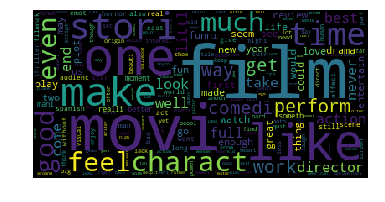

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [211]:
from sklearn.model_selection import train_test_split

X = df.cleaned
y = df.label
x_not_clean = df.Review

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape,type(X_train))

(384000,) (384000,) <class 'pandas.core.series.Series'>


I have made 2 pipelines to see how important the preporcessing part is.

In [102]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

pipeline1 = make_pipeline(TfidfVectorizer(ngram_range=(1,2), 
                                          stop_words='english', 
                                          sublinear_tf=True),
                          SGDClassifier(loss = 'log',max_iter=10))

pipeline2 = make_pipeline(TfidfVectorizer(ngram_range=(1,3), 
                                          stop_words='english', 
                                          sublinear_tf=True),
                          SGDClassifier(loss = 'log',max_iter=10))

scores1 = cross_val_score(pipeline1,X, y, cv=10)
scores2 = cross_val_score(pipeline2,X, y, cv=10)
scores3 = cross_val_score(pipeline1,x_not_clean, y, cv=10)
scores4 = cross_val_score(pipeline2,x_not_clean, y, cv=10)
sum(scores/len(scores))

/Users/pravien/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/pravien/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/pravien/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters

0.7516958333333336

In [104]:
print(sum(scores1/len(scores1)))
print(sum(scores2/len(scores2)))
print(sum(scores3/len(scores3)))
print(sum(scores4/len(scores4)))

0.75173125
0.7487395833333331
0.7548729166666668
0.7514437500000001


The data above shows that NLTK libary doesnt make a big difference. But this might be because of the SGDClassifier. The reason why i choose the SGDClassifier is because it has a partial fit, that we need to train keep training the classfier. The accuracy score is 0.75, which is high acutelly pretty good.

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', sublinear_tf=True)
x_train = vectorizer.fit_transform(X_train,y_train)

In [213]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'log')

In [214]:
clf.partial_fit(x_train,y_train, classes=np.unique(df.label))

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
X_test = vectorizer.transform(X_test)

AUC: 0.827


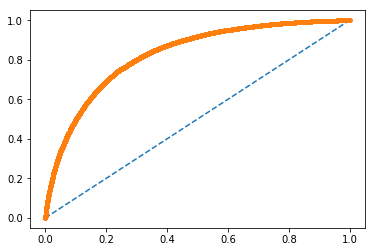

In [121]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The Roc-curve shows us that over classifier is struggling a bit. 
This is seen by the small area under the orange curve. 
The dataset being balanced is a prerequisite to use the ROC-curve, 
but it does not guarantee that the score will be high. But the score is still very acceptable.

Ovarall the classifier does solve the business case, which was to predict the tone of a review(positv / negativ).

# Trustpilot scraper

This part tries to implement the online learning part. We have decided to scrape reviews from trustpilot. This part is not finished due to some issues with the group.

In [122]:
from requests import get
import csv

In [123]:
url = 'https://www.trustpilot.com/review/www.amazon.com?page={}'
def get_url_response(url,pages=10):
    for index,_ in enumerate(range(0,pages)):
        yield get(url)

In [ ]:
def write_file(filename, delimiter = '~'):
   with open('employee_file.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    

In [182]:
def mood_of_rating(rating):
    if rating <= 3:
        return 1
    else: 
        return 0

In [190]:
from bs4 import BeautifulSoup
def retrive_element(response):
    html_soup = BeautifulSoup(response.text, 'html.parser')
    review = html_soup.find_all('p',{'class':'review-content__text'})
    rating = html_soup.find_all('div',{'class':'star-rating--medium'})
    for i,rating in zip(review,rating):
        text = str(i.text)
        classes = str (rating.attrs['class'])
        rating = re.findall(r'\d',classes)[0]
        yield (text.replace("/n","").strip(),rating,mood_of_rating(int(rating)),)
    

In [219]:
url = 'https://www.trustpilot.com/review/www.amazon.com?page={}'
import numpy as np
temp_list = []
for index,_ in enumerate(range(0,10)):
       temp_list.append(retrive_element(get(url)))
for i in temp_list:
    for j in i:
        review, rating, mood = j
        print([review])
        X_train = vectorizer.transform([review])
        y_train = np.asarray([mood])
        #print(X_train.shape,y_train.reshape(1,))
        #clf.partial_fit(x_train, y_train)
        break
    break    

["I bought two pairs of swimming trunks on same day delivery only to be told at 730pm sorry we made a mistake and you can't have them tonight. Fine then on the day after I received an Email saying they had been posted so I rushed to the door to find nothing not a sausage let alone a couple of pairs of speedos. Amazon were completely unhelpful and only issued a refund after I threatened legal action. So prime is now cancelled and I guess I'll support my local high street from now on."]
